<a href="https://colab.research.google.com/github/violetamenendez/git_workshop/blob/main/git_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

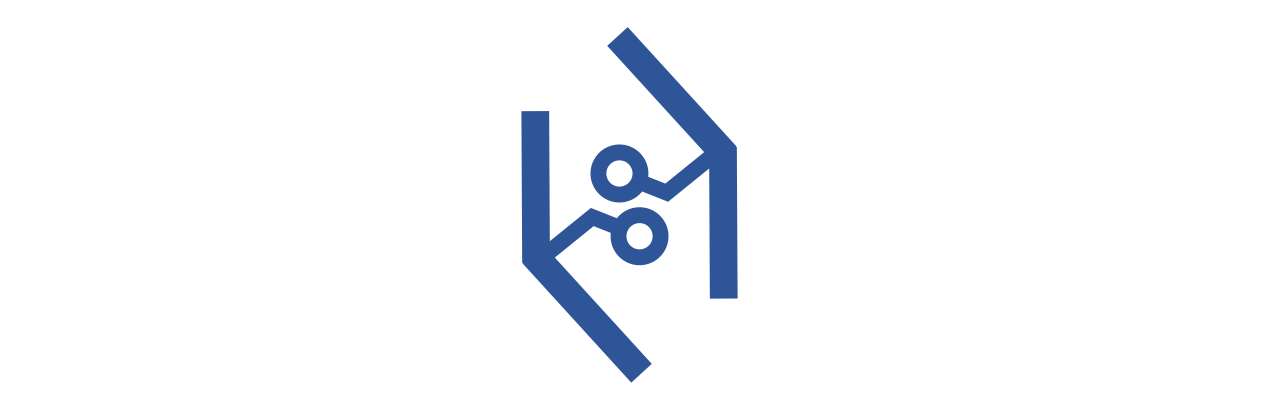

# git secret sauce

Welcome to the January 2023 edition of the Monthly Mini Hacks, and the second edition of this Git workshop.

We will learn the basics of git commands and git workflow. We will try to go deeper into some concepts and some more advance commands that will make your life easier. We will also try to cover some basic usage of github as a git service for code sharing and collaborating.

This notebook is meant to be an interactive interface for our workshop demos. You can see the previous workshop slides here: https://f1000research.com/slides/11-586 

## Demo 1: Starting a repo

In [1]:
!git --version

git version 2.25.1


In [2]:
!git config user.name
!git config user.email

In [3]:
!git config --global user.email "jan.minihack@mmh.com"

!git config --global user.name "Jan M. Minihack"

In [4]:
!git config user.name
!git config user.email

Jan M. Minihack
jan.minihack@mmh.com


In [5]:
!git config --list

filter.lfs.clean=git-lfs clean -- %f
filter.lfs.smudge=git-lfs smudge -- %f
filter.lfs.process=git-lfs filter-process
filter.lfs.required=true
user.email=jan.minihack@mmh.com
user.name=Jan M. Minihack


In [6]:
!mkdir git_workshop
%cd git_workshop

/content/git_workshop


In [7]:
!git init

Initialized empty Git repository in /content/git_workshop/.git/


In [8]:
!git status

On branch master

No commits yet

nothing to commit (create/copy files and use "git add" to track)


In [9]:
!echo "print('Hello world')" > hello.py
!cat hello.py

print('Hello world')


In [10]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	hello.py

nothing added to commit but untracked files present (use "git add" to track)


In [11]:
!git diff

In [12]:
!git add hello.py

In [13]:
!git status

On branch master

No commits yet

Changes to be committed:
  (use "git rm --cached <file>..." to unstage)
	new file:   hello.py



In [14]:
!git diff --cached

diff --git a/hello.py b/hello.py
new file mode 100644
index 0000000..f7d1785
--- /dev/null
+++ b/hello.py
@@ -0,0 +1 @@
+print('Hello world')


In [15]:
!git commit -m "Add hello world"

[master (root-commit) 97c3647] Add hello world
 1 file changed, 1 insertion(+)
 create mode 100644 hello.py


In [16]:
!git status

On branch master
nothing to commit, working tree clean


In [17]:
!git log

commit 97c3647d7ef773c45bb01d3a415e76f74fbeef2e (HEAD -> master)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 11:58:32 2023 +0000

    Add hello world


In [18]:
!git log -p

commit 97c3647d7ef773c45bb01d3a415e76f74fbeef2e (HEAD -> master)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 11:58:32 2023 +0000

    Add hello world

diff --git a/hello.py b/hello.py
new file mode 100644
index 0000000..f7d1785
--- /dev/null
+++ b/hello.py
@@ -0,0 +1 @@
+print('Hello world')


In [19]:
!git log --stat

commit 97c3647d7ef773c45bb01d3a415e76f74fbeef2e (HEAD -> master)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 11:58:32 2023 +0000

    Add hello world

 hello.py | 1 +
 1 file changed, 1 insertion(+)


In [20]:
!git log --oneline

97c3647 (HEAD -> master) Add hello world


In [21]:

!git show HEAD

commit 97c3647d7ef773c45bb01d3a415e76f74fbeef2e (HEAD -> master)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 11:58:32 2023 +0000

    Add hello world

diff --git a/hello.py b/hello.py
new file mode 100644
index 0000000..f7d1785
--- /dev/null
+++ b/hello.py
@@ -0,0 +1 @@
+print('Hello world')


In [22]:
!sed -i '$s/$/\n\nprint("and goodbye"/' hello.py
!cat hello.py

print('Hello world')

print("and goodbye"


In [23]:
!git status

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


In [24]:
!git diff

diff --git a/hello.py b/hello.py
index f7d1785..773323c 100644
--- a/hello.py
+++ b/hello.py
@@ -1 +1,3 @@
 print('Hello world')
+
+print("and goodbye"


In [25]:
!sed -i "1s/^/print('Hey!!')\n/" hello.py

In [26]:
!git diff

diff --git a/hello.py b/hello.py
index f7d1785..99a7853 100644
--- a/hello.py
+++ b/hello.py
@@ -1 +1,4 @@
+print('Hey!!')
 print('Hello world')
+
+print("and goodbye"


When prompted, first choose choose `s` (split), then for the first hunk choose `n` (no) when prompted again, and for the second hunk choose `y` (yes)

In [27]:
!git add -p

diff --git a/hello.py b/hello.py
index f7d1785..99a7853 100644
--- a/hello.py
+++ b/hello.py
@@ -1 +1,4 @@
+print('Hey!!')
 print('Hello world')
+
+print("and goodbye"
(1/1) Stage this hunk [y,n,q,a,d,s,e,?]? s
Split into 2 hunks.
@@ -1 +1,2 @@
+print('Hey!!')
 print('Hello world')
(1/2) Stage this hunk [y,n,q,a,d,j,J,g,/,e,?]? n
@@ -1 +2,3 @@
 print('Hello world')
+
+print("and goodbye"
(2/2) Stage this hunk [y,n,q,a,d,K,g,/,e,?]? y



In [28]:
!git status

On branch master
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   hello.py

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py



In [29]:
!git diff

diff --git a/hello.py b/hello.py
index 773323c..99a7853 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,4 @@
+print('Hey!!')
 print('Hello world')
 
 print("and goodbye"


In [30]:
!git diff --staged

diff --git a/hello.py b/hello.py
index f7d1785..773323c 100644
--- a/hello.py
+++ b/hello.py
@@ -1 +1,3 @@
 print('Hello world')
+
+print("and goodbye"


In [31]:
!git commit -m "Add farewell"

[master b0a8757] Add farewell
 1 file changed, 2 insertions(+)


In [32]:
!git log -p

commit b0a875705ed2243b028a555dfd1233e5dc973283 (HEAD -> master)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 11:58:49 2023 +0000

    Add farewell

diff --git a/hello.py b/hello.py
index f7d1785..773323c 100644
--- a/hello.py
+++ b/hello.py
@@ -1 +1,3 @@
 print('Hello world')
+
+print("and goodbye"

commit 97c3647d7ef773c45bb01d3a415e76f74fbeef2e
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 11:58:32 2023 +0000

    Add hello world

diff --git a/hello.py b/hello.py
new file mode 100644
index 0000000..f7d1785
--- /dev/null
+++ b/hello.py
@@ -0,0 +1 @@
+print('Hello world')


In [33]:
!sed -i '$s/$/)/' hello.py
!cat hello.py

print('Hey!!')
print('Hello world')

print("and goodbye")


When prompted, first choose choose `s` (split), then for the first hunk choose `n` (no) when prompted again, and for the second hunk choose `y` (yes)

In [34]:
!git add -p

diff --git a/hello.py b/hello.py
index 773323c..daaca5d 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,4 @@
+print('Hey!!')
 print('Hello world')
 
-print("and goodbye"
+print("and goodbye")
(1/1) Stage this hunk [y,n,q,a,d,s,e,?]? s
Split into 2 hunks.
@@ -1,2 +1,3 @@
+print('Hey!!')
 print('Hello world')
 
(1/2) Stage this hunk [y,n,q,a,d,j,J,g,/,e,?]? n
@@ -1,3 +2,3 @@
 print('Hello world')
 
-print("and goodbye"
+print("and goodbye")
(2/2) Stage this hunk [y,n,q,a,d,K,g,/,e,?]? y



Click at the end of the file where the cursor is flickering, then type `:wq` (this will save (w) the commit message as it is and will quit (q) the editor). When doing this in your computer the commit message will open in your own text editor of choice, you just need to modify the message if necessary and save and close the file.

In [35]:
!git commit --amend

<ontent/git_workshop/.git/COMMIT_EDITMSG" 14L, 326C▽  [>c]10;?]11;?Add farewell

# Please enter the commit message for your changes. Lines starting
# with '#' will be ignored, and an empty message aborts the commit.
#
# Date:      Fri Jan 27 11:58:49 2023 +0000
#
# On branch master
# Changes to be committed:
#       modified:   hello.py
#
# Changes not staged for commit:
#       modified:   hello.py
#

[master 27480b6] Add farewell
 Date: Fri Jan 27 11:58:49 2023 +0000
 1 file changed, 2 insertions(+)


In [36]:
!git log -p

commit 27480b6e5a79659ad7be147ea6c8e432293f7e03 (HEAD -> master)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 11:58:49 2023 +0000

    Add farewell

diff --git a/hello.py b/hello.py
index f7d1785..d826caf 100644
--- a/hello.py
+++ b/hello.py
@@ -1 +1,3 @@
 print('Hello world')
+
+print("and goodbye")

commit 97c3647d7ef773c45bb01d3a415e76f74fbeef2e
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 11:58:32 2023 +0000

    Add hello world

diff --git a/hello.py b/hello.py
new file mode 100644
index 0000000..f7d1785
--- /dev/null
+++ b/hello.py
@@ -0,0 +1 @@
+print('Hello world')


In [37]:
!git status

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


When prompted, choose `y` (yes)

In [38]:
!git add -p

diff --git a/hello.py b/hello.py
index d826caf..daaca5d 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,4 @@
+print('Hey!!')
 print('Hello world')
 
 print("and goodbye")
(1/1) Stage this hunk [y,n,q,a,d,e,?]? y



In [39]:
!git status

On branch master
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   hello.py



In [40]:
!git restore --staged hello.py

In [41]:
!git status

On branch master
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


In [42]:
!git restore hello.py

In [43]:
!git status

On branch master
nothing to commit, working tree clean


## Demo 2: git config/setup

In [44]:
!git log --oneline

27480b6 (HEAD -> master) Add farewell
97c3647 Add hello world


In [45]:
!ls -a .git

.   branches	    config	 HEAD	index  logs	refs
..  COMMIT_EDITMSG  description  hooks	info   objects


In [46]:
!cat ../../home/.gitconfig

cat: ../../home/.gitconfig: No such file or directory


In [47]:
!cat .git/config

[core]
	repositoryformatversion = 0
	filemode = true
	bare = false
	logallrefupdates = true


In [48]:
!git log --graph --full-history --all --color --pretty=tformat:"%x1b[31m%h%x09%x1b[32m%d%x1b[0m%x20%s%x20%x1b[33m(%an)%x1b[0m"


* 27480b6	 (HEAD -> master) Add farewell (Jan M. Minihack)
* 97c3647	 Add hello world (Jan M. Minihack)


In [49]:
!echo "[alias]" >> .git/config
!echo -e "\tgr = log --graph --full-history --all --color --pretty=tformat:\"%x1b[31m%h%x09%x1b[32m%d%x1b[0m%x20%s%x20%x1b[33m(%an)%x1b[0m\"" >> .git/config

In [50]:
!cat .git/config

[core]
	repositoryformatversion = 0
	filemode = true
	bare = false
	logallrefupdates = true
[alias]
	gr = log --graph --full-history --all --color --pretty=tformat:"%x1b%h%x09%x1b%d%x1b%x20%s%x20%x1b(%an)%x1b"


In [51]:
!git gr

* 27480b6	 (HEAD -> master) Add farewell (Jan M. Minihack)
* 97c3647	 Add hello world (Jan M. Minihack)


## Demo 3: Branching

In [52]:
!git branch

* master


In [53]:
!git branch violeta/test1
!git branch

* master
  violeta/test1


In [54]:
!git checkout violeta/test1

Switched to branch 'violeta/test1'


In [55]:
!git gr

* 27480b6	 (HEAD -> violeta/test1, master) Add farewell (Jan M. Minihack)
* 97c3647	 Add hello world (Jan M. Minihack)


In [56]:
!git checkout -b violeta/test2
!git branch

Switched to a new branch 'violeta/test2'
  master
  violeta/test1
* violeta/test2


In [57]:
!sed -i "1s/^/print('Hey!!')\n/" hello.py
!cat hello.py

print('Hey!!')
print('Hello world')

print("and goodbye")


In [58]:
!cat hello.py

print('Hey!!')
print('Hello world')

print("and goodbye")


In [59]:
!git status

On branch violeta/test2
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


In [60]:
!git commit -am "Try a different greeting"

[violeta/test2 50fbae0] Try a different greeting
 1 file changed, 1 insertion(+)


In [61]:
!git log -p

commit 50fbae0f5d9b3567c9a79538d8836e4ccf741959 (HEAD -> violeta/test2)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 12:01:44 2023 +0000

    Try a different greeting

diff --git a/hello.py b/hello.py
index d826caf..daaca5d 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,4 @@
+print('Hey!!')
 print('Hello world')
 
 print("and goodbye")

commit 27480b6e5a79659ad7be147ea6c8e432293f7e03 (violeta/test1, master)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 11:58:49 2023 +0000

    Add farewell

diff --git a/hello.py b/hello.py
index f7d1785..d826caf 100644
--- a/hello.py
+++ b/hello.py
@@ -1 +1,3 @@
 print('Hello world')
+
+print("and goodbye")

commit 97c3647d7ef773c45bb01d3a415e76f74fbeef2e
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 11:58:32 2023 +0000

    Add hello world

diff --git a/hello.py b/hello.py
new file mode 100644
index 0000000..f7d1785
--- /dev/null
+++ b/hello.py
@@ -0,0 +1 @@
+print('Hello world')


In [62]:
!git gr

* 50fbae0	 (HEAD -> violeta/test2) Try a different greeting (Jan M. Minihack)
* 27480b6	 (violeta/test1, master) Add farewell (Jan M. Minihack)
* 97c3647	 Add hello world (Jan M. Minihack)


In [63]:
!git checkout violeta/test1

Switched to branch 'violeta/test1'


In [64]:
!sed -i "1s/^/print('Yoyoyo!!')\n/" hello.py
!cat hello.py

print('Yoyoyo!!')
print('Hello world')

print("and goodbye")


In [65]:
!git commit -am "Try a different more casual greeting"

[violeta/test1 8bc5174] Try a different more casual greeting
 1 file changed, 1 insertion(+)


In [66]:
!git log --oneline

8bc5174 (HEAD -> violeta/test1) Try a different more casual greeting
27480b6 (master) Add farewell
97c3647 Add hello world


In [67]:
!git gr

* 8bc5174	 (HEAD -> violeta/test1) Try a different more casual greeting (Jan M. Minihack)
| * 50fbae0	 (violeta/test2) Try a different greeting (Jan M. Minihack)
|/  
* 27480b6	 (master) Add farewell (Jan M. Minihack)
* 97c3647	 Add hello world (Jan M. Minihack)


In [68]:
!git checkout master

Switched to branch 'master'


In [69]:
!git log

commit 27480b6e5a79659ad7be147ea6c8e432293f7e03 (HEAD -> master)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 11:58:49 2023 +0000

    Add farewell

commit 97c3647d7ef773c45bb01d3a415e76f74fbeef2e
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 11:58:32 2023 +0000

    Add hello world


In [70]:
!git merge violeta/test2

Updating 27480b6..50fbae0
Fast-forward
 hello.py | 1 +
 1 file changed, 1 insertion(+)


In [71]:
!git log

commit 50fbae0f5d9b3567c9a79538d8836e4ccf741959 (HEAD -> master, violeta/test2)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 12:01:44 2023 +0000

    Try a different greeting

commit 27480b6e5a79659ad7be147ea6c8e432293f7e03
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 11:58:49 2023 +0000

    Add farewell

commit 97c3647d7ef773c45bb01d3a415e76f74fbeef2e
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 11:58:32 2023 +0000

    Add hello world


In [72]:
!git gr

* 8bc5174	 (violeta/test1) Try a different more casual greeting (Jan M. Minihack)
| * 50fbae0	 (HEAD -> master, violeta/test2) Try a different greeting (Jan M. Minihack)
|/  
* 27480b6	 Add farewell (Jan M. Minihack)
* 97c3647	 Add hello world (Jan M. Minihack)


In [73]:
!git merge violeta/test1

Auto-merging hello.py
CONFLICT (content): Merge conflict in hello.py
Automatic merge failed; fix conflicts and then commit the result.


In [74]:
!git status

On branch master
You have unmerged paths.
  (fix conflicts and run "git commit")
  (use "git merge --abort" to abort the merge)

Unmerged paths:
  (use "git add <file>..." to mark resolution)
	both modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


In [75]:
!git diff

diff --cc hello.py
index daaca5d,51e9ef2..0000000
--- a/hello.py
+++ b/hello.py
@@@ -1,4 -1,4 +1,8 @@@
++<<<<<<< HEAD
 +print('Hey!!')
++=======
+ print('Yoyoyo!!')
++>>>>>>> violeta/test1
  print('Hello world')
  
  print("and goodbye")


In [76]:
!echo -e "print('Yoyoyo!!')\nprint('Hello world')\n\nprint(\"and goodbye\")" > hello.py
!cat hello.py

print('Yoyoyo!!')
print('Hello world')

print("and goodbye")


In [77]:
!git add hello.py

In [78]:
!git status

On branch master
All conflicts fixed but you are still merging.
  (use "git commit" to conclude merge)

Changes to be committed:
	modified:   hello.py



In [79]:
!git diff --staged

diff --git a/hello.py b/hello.py
index daaca5d..51e9ef2 100644
--- a/hello.py
+++ b/hello.py
@@ -1,4 +1,4 @@
-print('Hey!!')
+print('Yoyoyo!!')
 print('Hello world')
 
 print("and goodbye")


In [80]:
!git commit -m "Update greeting"

[master 3fa28cb] Update greeting


In [81]:
!git log -p

commit 3fa28cbf2e58d42fb041fec3ddfd3862adee87a8 (HEAD -> master)
Merge: 50fbae0 8bc5174
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 12:01:47 2023 +0000

    Update greeting

commit 8bc517464961ad30a7a5660339b5681d955c5c76 (violeta/test1)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 12:01:45 2023 +0000

    Try a different more casual greeting

diff --git a/hello.py b/hello.py
index d826caf..51e9ef2 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,4 @@
+print('Yoyoyo!!')
 print('Hello world')
 
 print("and goodbye")

commit 50fbae0f5d9b3567c9a79538d8836e4ccf741959 (violeta/test2)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 12:01:44 2023 +0000

    Try a different greeting

diff --git a/hello.py b/hello.py
index d826caf..daaca5d 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,4 @@
+print('Hey!!')
 print('Hello world')
 
 print("and goodbye")

commit 27480b6e5a79659ad7be147ea6c8e432293f7e03
Author: Jan M. Minihack <jan.miniha

In [82]:
!git gr

*   3fa28cb	 (HEAD -> master) Update greeting (Jan M. Minihack)
|\  
| * 8bc5174	 (violeta/test1) Try a different more casual greeting (Jan M. Minihack)
* | 50fbae0	 (violeta/test2) Try a different greeting (Jan M. Minihack)
|/  
* 27480b6	 Add farewell (Jan M. Minihack)
* 97c3647	 Add hello world (Jan M. Minihack)


## Demo 4: Revisions, stash and reset

In [83]:
!git show HEAD~2

commit 27480b6e5a79659ad7be147ea6c8e432293f7e03
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 11:58:49 2023 +0000

    Add farewell

diff --git a/hello.py b/hello.py
index f7d1785..d826caf 100644
--- a/hello.py
+++ b/hello.py
@@ -1 +1,3 @@
 print('Hello world')
+
+print("and goodbye")


In [84]:
!git checkout HEAD~2

Note: switching to 'HEAD~2'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 27480b6 Add farewell


In [85]:
!sed -i '$s/$/\n\nprint("byeeee")/' hello.py
!cat hello.py

print('Hello world')

print("and goodbye")

print("byeeee")


In [86]:
!git status

HEAD detached at 27480b6
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


In [87]:
!git diff

diff --git a/hello.py b/hello.py
index d826caf..4ed4d24 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,5 @@
 print('Hello world')
 
 print("and goodbye")
+
+print("byeeee")


In [88]:
!git commit -am "More goodbyes"

[detached HEAD 2e28ef7] More goodbyes
 1 file changed, 2 insertions(+)


In [89]:
!git log

commit 2e28ef71d41aa2c30f2c2e1371543711ea84ec40 (HEAD)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 12:01:48 2023 +0000

    More goodbyes

commit 27480b6e5a79659ad7be147ea6c8e432293f7e03
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 11:58:49 2023 +0000

    Add farewell

commit 97c3647d7ef773c45bb01d3a415e76f74fbeef2e
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 11:58:32 2023 +0000

    Add hello world


In [90]:
!git switch -

any of your branches:

  2e28ef7 More goodbyes

If you want to keep it by creating a new branch, this may be a good time
to do so with:

 git branch <new-branch-name> 2e28ef7

Switched to branch 'master'


In [91]:
!git log --oneline

3fa28cb (HEAD -> master) Update greeting
8bc5174 (violeta/test1) Try a different more casual greeting
50fbae0 (violeta/test2) Try a different greeting
27480b6 Add farewell
97c3647 Add hello world


In [92]:
!git checkout HEAD~2

Note: switching to 'HEAD~2'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 27480b6 Add farewell


In [93]:
!sed -i '$s/$/\n\nprint("adieu!")/' hello.py
!cat hello.py

print('Hello world')

print("and goodbye")

print("adieu!")


In [94]:
!git diff

diff --git a/hello.py b/hello.py
index d826caf..29443ce 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,5 @@
 print('Hello world')
 
 print("and goodbye")
+
+print("adieu!")


In [95]:
!git commit -am "More dramatic farewell"

[detached HEAD 42f030b] More dramatic farewell
 1 file changed, 2 insertions(+)


In [96]:
!git switch -c violeta/test3

Switched to a new branch 'violeta/test3'


In [97]:
!git gr

* 42f030b	 (HEAD -> violeta/test3) More dramatic farewell (Jan M. Minihack)
| *   3fa28cb	 (master) Update greeting (Jan M. Minihack)
| |\  
| | * 8bc5174	 (violeta/test1) Try a different more casual greeting (Jan M. Minihack)
| |/  
|/|   
| * 50fbae0	 (violeta/test2) Try a different greeting (Jan M. Minihack)
|/  
* 27480b6	 Add farewell (Jan M. Minihack)
* 97c3647	 Add hello world (Jan M. Minihack)


In [98]:
!sed -i "1s/^/print('Bonjour...')\n/" hello.py
!cat hello.py

print('Bonjour...')
print('Hello world')

print("and goodbye")

print("adieu!")


In [99]:
!git status

On branch violeta/test3
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


In [100]:
!git switch master

error: Your local changes to the following files would be overwritten by checkout:
	hello.py
Please commit your changes or stash them before you switch branches.
Aborting


In [101]:
!git stash

Saved working directory and index state WIP on test3: 42f030b More dramatic farewell


In [102]:
!git status

On branch violeta/test3
nothing to commit, working tree clean


In [103]:
!git switch master

Switched to branch 'master'


In [104]:
!git switch -

Switched to branch 'violeta/test3'


In [105]:
!git status

On branch violeta/test3
nothing to commit, working tree clean


In [106]:
!git stash list

stash@{0}: WIP on test3: 42f030b More dramatic farewell


In [107]:
!git stash pop

On branch violeta/test3
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")
Dropped refs/stash@{0} (89eeade7f476c9791e7337f57f879f082fa5c933)


In [108]:
!git stash list

In [109]:
!git diff

diff --git a/hello.py b/hello.py
index 29443ce..78d89e1 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,4 @@
+print('Bonjour...')
 print('Hello world')
 
 print("and goodbye")


In [110]:
!git commit -am "Add French greeting"

[violeta/test3 6470abc] Add French greeting
 1 file changed, 1 insertion(+)


In [111]:
!git log --oneline

6470abc (HEAD -> violeta/test3) Add French greeting
42f030b More dramatic farewell
27480b6 Add farewell
97c3647 Add hello world


In [112]:
!git status

On branch violeta/test3
nothing to commit, working tree clean


In [113]:
!sed -i '$s/$/\n\nprint("The End")/' hello.py
!cat hello.py

print('Bonjour...')
print('Hello world')

print("and goodbye")

print("adieu!")

print("The End")


In [114]:
!git status

On branch violeta/test3
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


In [115]:
!git diff

diff --git a/hello.py b/hello.py
index 78d89e1..4512206 100644
--- a/hello.py
+++ b/hello.py
@@ -4,3 +4,5 @@ print('Hello world')
 print("and goodbye")
 
 print("adieu!")
+
+print("The End")


In [116]:
!git reset --soft HEAD~1

In [117]:
!git log --oneline

42f030b (HEAD -> violeta/test3) More dramatic farewell
27480b6 Add farewell
97c3647 Add hello world


In [118]:
!git status

On branch violeta/test3
Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   hello.py

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py



In [119]:
!git diff --staged

diff --git a/hello.py b/hello.py
index 29443ce..78d89e1 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,4 @@
+print('Bonjour...')
 print('Hello world')
 
 print("and goodbye")


In [120]:
!git diff

diff --git a/hello.py b/hello.py
index 78d89e1..4512206 100644
--- a/hello.py
+++ b/hello.py
@@ -4,3 +4,5 @@ print('Hello world')
 print("and goodbye")
 
 print("adieu!")
+
+print("The End")


In [121]:
!git commit -m "Add French greeting"

[violeta/test3 0b44789] Add French greeting
 1 file changed, 1 insertion(+)


In [122]:
!git log --oneline

0b44789 (HEAD -> violeta/test3) Add French greeting
42f030b More dramatic farewell
27480b6 Add farewell
97c3647 Add hello world


In [123]:
!git status

On branch violeta/test3
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


In [124]:
!git diff

diff --git a/hello.py b/hello.py
index 78d89e1..4512206 100644
--- a/hello.py
+++ b/hello.py
@@ -4,3 +4,5 @@ print('Hello world')
 print("and goodbye")
 
 print("adieu!")
+
+print("The End")


In [125]:
!git reset --mixed HEAD~1

Unstaged changes after reset:
M	hello.py


In [126]:
!git status

On branch violeta/test3
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


In [127]:
!git diff

diff --git a/hello.py b/hello.py
index 29443ce..4512206 100644
--- a/hello.py
+++ b/hello.py
@@ -1,5 +1,8 @@
+print('Bonjour...')
 print('Hello world')
 
 print("and goodbye")
 
 print("adieu!")
+
+print("The End")


When prompted, first choose `s` (split), then for the first hunk choose `y` (yes) when prompted again, and for the second hunk choose `q` (quit).

`q` will tell `git add` that you do not want to stage this hunk or any of the remaining hunks. Right now we only have two hunks (separate changes), but in a normal situation you will have lots of small changes, so if you are interested only in staging one change, you can `y` that change and then `q` instead of saying `n` to all of them.

In [128]:
!git add -p

diff --git a/hello.py b/hello.py
index 29443ce..4512206 100644
--- a/hello.py
+++ b/hello.py
@@ -1,5 +1,8 @@
+print('Bonjour...')
 print('Hello world')
 
 print("and goodbye")
 
 print("adieu!")
+
+print("The End")
(1/1) Stage this hunk [y,n,q,a,d,s,e,?]? s
Split into 2 hunks.
@@ -1,5 +1,6 @@
+print('Bonjour...')
 print('Hello world')
 
 print("and goodbye")
 
 print("adieu!")
(1/2) Stage this hunk [y,n,q,a,d,j,J,g,/,e,?]? y
@@ -1,5 +2,7 @@
 print('Hello world')
 
 print("and goodbye")
 
 print("adieu!")
+
+print("The End")
(2/2) Stage this hunk [y,n,q,a,d,K,g,/,e,?]? q



In [129]:
!git diff --staged

diff --git a/hello.py b/hello.py
index 29443ce..78d89e1 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,4 @@
+print('Bonjour...')
 print('Hello world')
 
 print("and goodbye")


In [130]:
!git commit -m "Add French greeting"

[violeta/test3 9e6daa8] Add French greeting
 1 file changed, 1 insertion(+)


In [131]:
!git log --oneline

9e6daa8 (HEAD -> violeta/test3) Add French greeting
42f030b More dramatic farewell
27480b6 Add farewell
97c3647 Add hello world


In [132]:
!git status

On branch violeta/test3
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


In [133]:
!git reset --hard HEAD~1

HEAD is now at 42f030b More dramatic farewell


In [134]:
!git log --oneline

42f030b (HEAD -> violeta/test3) More dramatic farewell
27480b6 Add farewell
97c3647 Add hello world


In [135]:
!git status

On branch violeta/test3
nothing to commit, working tree clean


In [136]:
!cat hello.py

print('Hello world')

print("and goodbye")

print("adieu!")


## Demo 5: Linear history with **rebase**

In [137]:
!git gr

* 42f030b	 (HEAD -> violeta/test3) More dramatic farewell (Jan M. Minihack)
| *   3fa28cb	 (master) Update greeting (Jan M. Minihack)
| |\  
| | * 8bc5174	 (violeta/test1) Try a different more casual greeting (Jan M. Minihack)
| |/  
|/|   
| * 50fbae0	 (violeta/test2) Try a different greeting (Jan M. Minihack)
|/  
* 27480b6	 Add farewell (Jan M. Minihack)
* 97c3647	 Add hello world (Jan M. Minihack)


In [138]:
!git switch master

Switched to branch 'master'


In [139]:
!cat hello.py

print('Yoyoyo!!')
print('Hello world')

print("and goodbye")


In [140]:
!git switch violeta/test3

Switched to branch 'violeta/test3'


In [141]:
!git log --oneline

42f030b (HEAD -> violeta/test3) More dramatic farewell
27480b6 Add farewell
97c3647 Add hello world


In [142]:
!git rebase master

First, rewinding head to replay your work on top of it...
Applying: More dramatic farewell
Using index info to reconstruct a base tree...
M	hello.py
Falling back to patching base and 3-way merge...
Auto-merging hello.py


In [143]:
!git log --oneline

4354eb3 (HEAD -> violeta/test3) More dramatic farewell
3fa28cb (master) Update greeting
8bc5174 (violeta/test1) Try a different more casual greeting
50fbae0 (violeta/test2) Try a different greeting
27480b6 Add farewell
97c3647 Add hello world


In [144]:
!git gr

* 4354eb3	 (HEAD -> violeta/test3) More dramatic farewell (Jan M. Minihack)
*   3fa28cb	 (master) Update greeting (Jan M. Minihack)
|\  
| * 8bc5174	 (violeta/test1) Try a different more casual greeting (Jan M. Minihack)
* | 50fbae0	 (violeta/test2) Try a different greeting (Jan M. Minihack)
|/  
* 27480b6	 Add farewell (Jan M. Minihack)
* 97c3647	 Add hello world (Jan M. Minihack)


In [145]:
!git switch master

Switched to branch 'master'


In [146]:
!git merge violeta/test3

Updating 3fa28cb..4354eb3
Fast-forward
 hello.py | 2 ++
 1 file changed, 2 insertions(+)


In [147]:
!git gr

* 4354eb3	 (HEAD -> master, violeta/test3) More dramatic farewell (Jan M. Minihack)
*   3fa28cb	 Update greeting (Jan M. Minihack)
|\  
| * 8bc5174	 (violeta/test1) Try a different more casual greeting (Jan M. Minihack)
* | 50fbae0	 (violeta/test2) Try a different greeting (Jan M. Minihack)
|/  
* 27480b6	 Add farewell (Jan M. Minihack)
* 97c3647	 Add hello world (Jan M. Minihack)


In [148]:
!git checkout HEAD~3

Note: switching to 'HEAD~3'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 27480b6 Add farewell


In [149]:
!git switch -c violeta/test4

Switched to a new branch 'violeta/test4'


In [150]:
!sed -i '$s/$/\n\nprint("hasta la vista, baby")/' hello.py
!cat hello.py

print('Hello world')

print("and goodbye")

print("hasta la vista, baby")


In [151]:
!git diff

diff --git a/hello.py b/hello.py
index d826caf..b9c275e 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,5 @@
 print('Hello world')
 
 print("and goodbye")
+
+print("hasta la vista, baby")


In [152]:
!git add hello.py
!git commit -m "Add Terminator farewell"

[violeta/test4 730f189] Add Terminator farewell
 1 file changed, 2 insertions(+)


In [153]:
!git log --oneline

730f189 (HEAD -> violeta/test4) Add Terminator farewell
27480b6 Add farewell
97c3647 Add hello world


In [154]:
!git gr

* 730f189	 (HEAD -> violeta/test4) Add Terminator farewell (Jan M. Minihack)
| * 4354eb3	 (violeta/test3, master) More dramatic farewell (Jan M. Minihack)
| *   3fa28cb	 Update greeting (Jan M. Minihack)
| |\  
| | * 8bc5174	 (violeta/test1) Try a different more casual greeting (Jan M. Minihack)
| |/  
|/|   
| * 50fbae0	 (violeta/test2) Try a different greeting (Jan M. Minihack)
|/  
* 27480b6	 Add farewell (Jan M. Minihack)
* 97c3647	 Add hello world (Jan M. Minihack)


In [155]:
!git rebase master

First, rewinding head to replay your work on top of it...
Applying: Add Terminator farewell
Using index info to reconstruct a base tree...
M	hello.py
Falling back to patching base and 3-way merge...
Auto-merging hello.py
CONFLICT (content): Merge conflict in hello.py
error: Failed to merge in the changes.
Patch failed at 0001 Add Terminator farewell
hint: Use 'git am --show-current-patch' to see the failed patch
Resolve all conflicts manually, mark them as resolved with
"git add/rm <conflicted_files>", then run "git rebase --continue".
You can instead skip this commit: run "git rebase --skip".
To abort and get back to the state before "git rebase", run "git rebase --abort".


In [156]:
!git am --show-current-patch

commit 730f18991529353dfedbfd104e20ee9cd86953a2 (violeta/test4)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 12:05:25 2023 +0000

    Add Terminator farewell

diff --git a/hello.py b/hello.py
index d826caf..b9c275e 100644
--- a/hello.py
+++ b/hello.py
@@ -1,3 +1,5 @@
 print('Hello world')
 
 print("and goodbye")
+
+print("hasta la vista, baby")


In [157]:
!git status

rebase in progress; onto 4354eb3
You are currently rebasing branch 'violeta/test4' on '4354eb3'.
  (fix conflicts and then run "git rebase --continue")
  (use "git rebase --skip" to skip this patch)
  (use "git rebase --abort" to check out the original branch)

Unmerged paths:
  (use "git restore --staged <file>..." to unstage)
  (use "git add <file>..." to mark resolution)
	both modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


In [158]:
!git diff

diff --cc hello.py
index 31a5069,b9c275e..0000000
--- a/hello.py
+++ b/hello.py
@@@ -3,4 -2,4 +3,8 @@@ print('Hello world'
  
  print("and goodbye")
  
++<<<<<<< HEAD
 +print("adieu!")
++=======
+ print("hasta la vista, baby")
++>>>>>>> Add Terminator farewell


In [159]:
!echo -e "print('Yoyoyo!!')\nprint('Hello world')\n\nprint(\"and goodbye\")\n\nprint(\"adieu!\")\nprint(\"hasta la vista, baby\")" > hello.py
!cat hello.py

print('Yoyoyo!!')
print('Hello world')

print("and goodbye")

print("adieu!")
print("hasta la vista, baby")


In [160]:
!git diff

diff --cc hello.py
index 31a5069,b9c275e..0000000
--- a/hello.py
+++ b/hello.py
@@@ -3,4 -2,4 +3,5 @@@ print('Hello world'
  
  print("and goodbye")
  
 +print("adieu!")
+ print("hasta la vista, baby")


In [161]:
!git add hello.py
!git status

rebase in progress; onto 4354eb3
You are currently rebasing branch 'violeta/test4' on '4354eb3'.
  (all conflicts fixed: run "git rebase --continue")

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   hello.py



In [162]:
!git rebase --continue

Applying: Add Terminator farewell


In [163]:
!git log -p

commit d8c663c91e10ac1f459f97da2d49a6a08b4b990a (HEAD -> violeta/test4)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 12:05:25 2023 +0000

    Add Terminator farewell

diff --git a/hello.py b/hello.py
index 31a5069..10f3469 100644
--- a/hello.py
+++ b/hello.py
@@ -4,3 +4,4 @@ print('Hello world')
 print("and goodbye")
 
 print("adieu!")
+print("hasta la vista, baby")

commit 4354eb3c5e2aea07e49161a944b386a0f26c023a (violeta/test3, master)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 12:01:49 2023 +0000

    More dramatic farewell

diff --git a/hello.py b/hello.py
index 51e9ef2..31a5069 100644
--- a/hello.py
+++ b/hello.py
@@ -2,3 +2,5 @@ print('Yoyoyo!!')
 print('Hello world')
 
 print("and goodbye")
+
+print("adieu!")

commit 3fa28cbf2e58d42fb041fec3ddfd3862adee87a8
Merge: 50fbae0 8bc5174
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 12:01:47 2023 +0000

    Update greeting

commit 8bc517464961ad30a7a5660339b5681d955c5c76 (v

In [164]:
!git gr

* d8c663c	 (HEAD -> violeta/test4) Add Terminator farewell (Jan M. Minihack)
* 4354eb3	 (violeta/test3, master) More dramatic farewell (Jan M. Minihack)
*   3fa28cb	 Update greeting (Jan M. Minihack)
|\  
| * 8bc5174	 (violeta/test1) Try a different more casual greeting (Jan M. Minihack)
* | 50fbae0	 (violeta/test2) Try a different greeting (Jan M. Minihack)
|/  
* 27480b6	 Add farewell (Jan M. Minihack)
* 97c3647	 Add hello world (Jan M. Minihack)


In [165]:
!git switch master
!git merge violeta/test4

Switched to branch 'master'
Updating 4354eb3..d8c663c
Fast-forward
 hello.py | 1 +
 1 file changed, 1 insertion(+)


## Demo 6: Interactive rebase

In [167]:
!git log --graph --oneline master

* d8c663c (HEAD -> master, violeta/test4) Add Terminator farewell
* 4354eb3 (violeta/test3) More dramatic farewell
*   3fa28cb Update greeting
|\  
| * 8bc5174 (violeta/test1) Try a different more casual greeting
* | 50fbae0 (violeta/test2) Try a different greeting
|/  
* 27480b6 Add farewell
* 97c3647 Add hello world


When prompted, click on the flickering cursor and type `:s/pick/reword/`. This will tell the editor to change the first `pick` into a `reword`. On your own workspace you would do that in your normal text editor.

After, type `:wq` to save the changes. This will tell rebase that we want to rebase all the commits as normal, but just stop to reword the first commit in the list.

Then, the rebase will continue and you will be prompted to change the commit message. You can type `:s/different/new/`, then `:wq` again.

**Note:** The specifics of how you edit a file in colab are not important for this demonstration.

In [170]:
!git rebase -i HEAD~4

<shop/.git/rebase-merge/git-rebase-todo" 30L, 1297C▽  [>c]10;?]11;?pick 50fbae0 Try a different greeting
pick 8bc5174 Try a different more casual greeting
pick 4354eb3 More dramatic farewell
pick d8c663c Add Terminator farewell

# Rebase 27480b6..d8c663c onto d8c663c (4 commands)
#
# Commands:
# p, pick <commit> = use commit
# r, reword <commit> = use commit, but edit the commit message
# e, edit <commit> = use commit, but stop for amending
# s, squash <commit> = use commit, but meld into previous commit
# f, fixup <commit> = like "squash", but discard this commit's log message
# x, exec <command> = run command (the rest of the line) using shell
# b, break = stop here (continue rebase later with 'git rebase --continue')
# d, drop <commit> = remove commit
# l, label <label> = label current HEAD with a name
# t, reset <label> = reset HEAD to a label
# m, merge [-C <commit> | -c <commit>] <label> [# <oneline>]
# .       create a merge commit using the original merge commit's
# .     

In [171]:
!git diff

diff --cc hello.py
index daaca5d,51e9ef2..0000000
--- a/hello.py
+++ b/hello.py
@@@ -1,4 -1,4 +1,8 @@@
++<<<<<<< HEAD
 +print('Hey!!')
++=======
+ print('Yoyoyo!!')
++>>>>>>> 8bc5174... Try a different more casual greeting
  print('Hello world')
  
  print("and goodbye")


In [172]:
!echo -e "print('Yoyoyo!!')\nprint('Hello world')\n\nprint(\"and goodbye\")" > hello.py

In [173]:
!git diff

diff --cc hello.py
index daaca5d,51e9ef2..0000000
--- a/hello.py
+++ b/hello.py


In [174]:
!git status

interactive rebase in progress; onto 27480b6
Last commands done (2 commands done):
   reword 50fbae0 Try a different greeting
   pick 8bc5174 Try a different more casual greeting
Next commands to do (2 remaining commands):
   pick 4354eb3 More dramatic farewell
   pick d8c663c Add Terminator farewell
  (use "git rebase --edit-todo" to view and edit)
You are currently rebasing branch 'master' on '27480b6'.
  (fix conflicts and then run "git rebase --continue")
  (use "git rebase --skip" to skip this patch)
  (use "git rebase --abort" to check out the original branch)

Unmerged paths:
  (use "git restore --staged <file>..." to unstage)
  (use "git add <file>..." to mark resolution)
	both modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


In [175]:
!git add hello.py

In [176]:
!git status

interactive rebase in progress; onto 27480b6
Last commands done (2 commands done):
   reword 50fbae0 Try a different greeting
   pick 8bc5174 Try a different more casual greeting
Next commands to do (2 remaining commands):
   pick 4354eb3 More dramatic farewell
   pick d8c663c Add Terminator farewell
  (use "git rebase --edit-todo" to view and edit)
You are currently rebasing branch 'master' on '27480b6'.
  (all conflicts fixed: run "git rebase --continue")

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   hello.py



When prompted type `:wq` to accept the commit message.

In [177]:
!git rebase --continue

<ontent/git_workshop/.git/COMMIT_EDITMSG" 17L, 604C▽  [>c]10;?]11;?Try a different more casual greeting

# Please enter the commit message for your changes. Lines starting
# with '#' will be ignored, and an empty message aborts the commit.
#
# interactive rebase in progress; onto 27480b6
# Last commands done (2 commands done):
#    reword 50fbae0 Try a different greeting
#    pick 8bc5174 Try a different more casual greeting
# Next commands to do (2 remaining commands):
#    pick 4354eb3 More dramatic farewell
#    pick d8c663c Add Terminator farewell
# You are currently rebasing branch 'master' on '27480b6'.
#
# Changes to be committed:
#       modified:   hello.py
#

[detached HEAD 43ef252] Try a different more casual greeting
 1 file changed, 1 insertion(+), 1 deletion(-)
Successfully rebased and updated refs/heads/master.


In [178]:
!git log -p

commit 37039e4411642f9e876d76a278e06f788b539899 (HEAD -> master)
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 12:05:25 2023 +0000

    Add Terminator farewell

diff --git a/hello.py b/hello.py
index 31a5069..10f3469 100644
--- a/hello.py
+++ b/hello.py
@@ -4,3 +4,4 @@ print('Hello world')
 print("and goodbye")
 
 print("adieu!")
+print("hasta la vista, baby")

commit 002f06423437dec88aadb0e6ca388f5806ede4d8
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 12:01:49 2023 +0000

    More dramatic farewell

diff --git a/hello.py b/hello.py
index 51e9ef2..31a5069 100644
--- a/hello.py
+++ b/hello.py
@@ -2,3 +2,5 @@ print('Yoyoyo!!')
 print('Hello world')
 
 print("and goodbye")
+
+print("adieu!")

commit 43ef25215de1e76a55d0e94dad7d5ab51d5f237f
Author: Jan M. Minihack <jan.minihack@mmh.com>
Date:   Fri Jan 27 12:01:45 2023 +0000

    Try a different more casual greeting

diff --git a/hello.py b/hello.py
index daaca5d..51e9ef2 100644
--- a/hello.py
+++ b

In [180]:
!git log --graph --oneline master

* 37039e4 (HEAD -> master) Add Terminator farewell
* 002f064 More dramatic farewell
* 43ef252 Try a different more casual greeting
* 781b038 Try a new greeting
* 27480b6 Add farewell
* 97c3647 Add hello world


Now our branch master is linear! Woohoo! But the overall history is a bit messy with our test branches. But it doesn't matter any more as we don't care about those branches any more. We could delete them.

In [179]:
!git gr

* 37039e4	 (HEAD -> master) Add Terminator farewell (Jan M. Minihack)
* 002f064	 More dramatic farewell (Jan M. Minihack)
* 43ef252	 Try a different more casual greeting (Jan M. Minihack)
* 781b038	 Try a new greeting (Jan M. Minihack)
| * d8c663c	 (violeta/test4) Add Terminator farewell (Jan M. Minihack)
| * 4354eb3	 (violeta/test3) More dramatic farewell (Jan M. Minihack)
| *   3fa28cb	 Update greeting (Jan M. Minihack)
| |\  
| | * 8bc5174	 (violeta/test1) Try a different more casual greeting (Jan M. Minihack)
| |/  
|/|   
| * 50fbae0	 (violeta/test2) Try a different greeting (Jan M. Minihack)
|/  
* 27480b6	 Add farewell (Jan M. Minihack)
* 97c3647	 Add hello world (Jan M. Minihack)


In [182]:
!git branch -D violeta/test1 violeta/test2 violeta/test3 violeta/test4

Deleted branch violeta/test1 (was 8bc5174).
Deleted branch violeta/test2 (was 50fbae0).
Deleted branch violeta/test3 (was 4354eb3).
Deleted branch violeta/test4 (was d8c663c).


In [183]:
!git gr

* 37039e4	 (HEAD -> master) Add Terminator farewell (Jan M. Minihack)
* 002f064	 More dramatic farewell (Jan M. Minihack)
* 43ef252	 Try a different more casual greeting (Jan M. Minihack)
* 781b038	 Try a new greeting (Jan M. Minihack)
* 27480b6	 Add farewell (Jan M. Minihack)
* 97c3647	 Add hello world (Jan M. Minihack)


Amazing. In a normal situation we may not care about deleting the branches as we move on with our project, but they are just cluttering. Just make sure that if you delete a branch you are not losing any data!